In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/'My Drive'/'CIS 520 Project'

/content/drive/My Drive/CIS 520 Project


In [0]:
import pandas as pd


In [0]:
df=pd.read_pickle('reviews_bow.csv')

In [0]:
import nltk.tokenize as nt

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
df=df[:1000000]

In [0]:
main_list=[]

In [0]:
for index,row in df.iterrows():
  token_list=row['text']
  # print(token_list)
  pos_sentences=[nltk.pos_tag(token_list)]
  empty_list=[]
  for pos in pos_sentences:
    for pair in pos:
      if(pair[1]=='JJ' or pair[1]=='JJR' or pair[1]=='JJS'):
        empty_list.append((pair[0]))
  if(index%1000==0):
    print(empty_list)
  if(index%10000==0):
    print("**************************************************"+str(index)+"*************************************")
  main_list.append(empty_list)


['excited', 'online', 'special', 'overpriced', 'big', 'special', 'perfect', 'good', 'proud', 'incredible', 'crab', 'good', 'table', 'nice', 'u', 'free', 'last', 'slow', 'jug', 'wine', 'large', 'good', 'so-', 'special', 'chicken', 'good', 'big', 'bland', 'large', 'sit', 'available']
**************************************************0*************************************
['good', 'good', 'good', 'mexican', 'good', 'chinese', 'good', 'good', 'friendly', 'good', 'casual', 'yes', 'chinese', 'mexican', 'stupid', 'sushi', 'similar', 'snicker-doodle', 'free', 'sorry', 'dive', 'best', 'dive', 'north']
['tasty', 'different', 'one-of-a-kind']
['first', 'smile', 'ya', 'ta', 'white', 'red', 'ready', 'mean', 'white', 'tried', 'exceptional', 'red', 'pizza', 'preferred', 'white']
['agree', 'ny', 'best', 'theme', 'quick', 'good']
['apps', 'amazing', 'guacamole', 'excellent', 'personable']
['cold', 'cocked', 'good', 'busy']
['open', 'overall', 'bad']
['first', 'twelve', 'cozy', 'attentive', 'u', 'solid'

In [0]:
main_list=main_list[:1000000]
df['adj']=main_list

In [0]:
print(df)

                                                     text  ...                                                adj
0       ['ll, first, admit, excited, going, la, tavolt...  ...  [excited, online, special, overpriced, big, sp...
1       [one, best, italian, restaurant, city, several...  ...  [best, italian, several, delicious, italian, c...
2       [absolutely, fantastic, looking, quiet, relaxe...  ...  [fantastic, quiet, relaxed, delicious, fantast...
3       ['s, mt, washington, view, inside, look, like,...  ...  [mt, table, outstanding, enormous, enormous, c...
4       [favorite, amongst, girlfriend, family, fantas...  ...  [favorite, fantastic, authentic, excellent, un...
...                                                   ...  ...                                                ...
999995  [khoury, 's, new, improved, location, spacious...  ...  [new, spacious, arrived, extensive, free, low,...
999996  [ever, since, wife, brought, home, farooj, one...  ...                          

In [0]:
# df.to_csv("adjectives.csv")

In [0]:
print(main_list[:100])

[['excited', 'online', 'special', 'overpriced', 'big', 'special', 'perfect', 'good', 'proud', 'incredible', 'crab', 'good', 'table', 'nice', 'u', 'free', 'last', 'slow', 'jug', 'wine', 'large', 'good', 'so-', 'special', 'chicken', 'good', 'big', 'bland', 'large', 'sit', 'available'], ['best', 'italian', 'several', 'delicious', 'italian', 'classic', 'satisfied', 'wish', 'street'], ['fantastic', 'quiet', 'relaxed', 'delicious', 'fantastic', 'byob', 'great', 'knowledgable', 'enough', 'delicious', 'right', 'u', 'italy', 'u', 'comfortable', 'great', 'authentic', 'italian'], ['mt', 'table', 'outstanding', 'enormous', 'enormous', 'cryptic', 'make'], ['favorite', 'fantastic', 'authentic', 'excellent', 'unpretentious', 'secret', 'parmesan', 'chicken', 'parmesan', 'eggplant', 'eggplant', 'right', 'red', 'served', 'good', 'lamb', 'real', 'thankful', 'u'], ['beaten', 'small', 'spacious', 'top', 'top', 'table', 'larger', 'standard', 'italian', 'flare', 'start', 'special', 'shrimp', 'standard', 'hug

In [0]:
from nltk.corpus import sentiwordnet as swn
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
adj_list=[]
pos_score_list=[]
neg_score_list=[]
pos_words=[]
neg_words=[]
not_found_words=[]
equal_score_words=[]
weird_words=[]

In [0]:
listcount=0
for eachList in main_list:
  if(listcount%5000==0):
    print(str(listcount)+"\n"+"*********************************************************************")
    print("total valid adjectives so far",len(adj_list))
    print("positive score list ",len(pos_score_list))
    print("negative score list ",len(neg_score_list))
    print("positive adjectives so far",len(pos_words))
    print("negative adjectives so far",len(neg_words))
    print("equal scores words so far",len(equal_score_words))
    print("weird words so far",len(weird_words))
    print("words not found so far",len(not_found_words))
  listcount+=1
  for element in eachList:
    if(element not in adj_list):
      senti_list=list(swn.senti_synsets(element, 'a'))
      if(len(senti_list)!=0):
        adj_list.append(element)
        pos_score=senti_list[0].pos_score()
        neg_score=senti_list[0].neg_score()
        pos_score_list.append(pos_score)
        neg_score_list.append(neg_score)
        if(pos_score>neg_score):
          pos_words.append(element)
        elif(neg_score>pos_score):
          neg_words.append(element)
        elif(pos_score==neg_score):
          equal_score_words.append(element)
        else:
          weird_words.append(element)
      else:
        not_found_words.append(element)


0
*********************************************************************
total valid adjectives so far 0
positive score list  0
negative score list  0
positive adjectives so far 0
negative adjectives so far 0
equal scores words so far 0
weird words so far 0
words not found so far 0
5000
*********************************************************************
total valid adjectives so far 1840
positive score list  1840
negative score list  1840
positive adjectives so far 604
negative adjectives so far 546
equal scores words so far 690
weird words so far 0
words not found so far 17271
10000
*********************************************************************
total valid adjectives so far 2468
positive score list  2468
negative score list  2468
positive adjectives so far 804
negative adjectives so far 753
equal scores words so far 911
weird words so far 0
words not found so far 38404
15000
*********************************************************************
total valid adjectives so far 290

In [0]:
print(len(adj_list))

9493


In [0]:
print(not_found_words[:10000])

['crab', 'table', 'jug', 'wine', 'so-', 'sit', 'wish', 'street', 'byob', 'knowledgable', 'italy', 'mt', 'table', 'make', 'parmesan', 'parmesan', 'eggplant', 'eggplant', 'served', 'lamb', 'table', 'flare', 'start', 'shrimp', 'eggplant', 'butter/lemon/garlic', 'finish', 'penne', 'peasant', 'dish', 'bean', 'byob', 'bring', 'eggplant', 'entree', 'wish', 'friend', 'mid-may', 'veal', 'pittsburgh', 'table', 'table', 'tavola', 'cliff', 'know', '-byob', '-the', 'fir', 'chef', 'girlfriend', 'read', 'guest', 'menu', 'table', 'oh', 'waited', 'bread', 'spaghetti-o', 'tortellini', 'crab-', 'gravy', 'cannoli', 'desert-', 'else', 'wine', 'overall-', 'oh', 'friday', 'ate', 'brought', 'pasta', 'dish', 'pizza', 'table', 'table', 'bread', 'give', 'eggplant', 'penne', 'ok-the', 'chris', 'recommend', 'scallop', 'table', 'till', 'dinner', 'parm', 'veal', 'wine', 'waitress', 'table', 'guest', 'entree', 'ala', 'quest', 'gluten', 'gluten', 'salad', 'someday', 'tge', 'mt', 'bring', 'bottle', 'sighhh', 'give', 'g

In [0]:
print(equal_score_words)

['online', 'special', 'incredible', 'u', 'slow', 'italian', 'great', 'right', 'enormous', 'red', 'real', 'beaten', 'spacious', 'top', 'standard', 'old-fashioned', 'first', 'much', 'many', 'live', 'long', 'sweet', 'representative', 'empty', 'generous', 'regular', 'impressed', 'second', 'total', 'heavy', 'due', 'average', 'sensitive', 'smothered', 'overall', 'full', 'sicilian', 'creamy', 'third', 'thin', 'opening', 'timely', 'fried', 'tucked', 'dark', 'downstairs', 'least', 'noisy', 'neapolitan', 'particular', 'rustic', 'mean', 'remarkable', 'ordered', 'composite', 'creative', 'throwback', 'early', 'local', 'seated', 'middle', 'ready', 'later', 'entire', 'next', 'adequate', 'close', 'quick', 'minute', 'additional', 'hot', 'tepid', 'akin', 'artificial', 'closest', 'south', '30th', 'multiple', 'homemade', 'balsamic', 'prior', 'front', 'massive', 'current', 'generic', 'phenomenal', 'final', 'traditional', 'half', 'seasonal', 'upstairs', 'outside', 'basic', 'affordable', 'prompt', 'occasiona

In [0]:
    print("total valid adjectives so far",len(adj_list))
    print("positive score list ",len(pos_score_list))
    print("negative score list ",len(neg_score_list))
    print("positive adjectives so far",len(pos_words))
    print("negative adjectives so far",len(neg_words))
    print("equal scores words so far",len(equal_score_words))
    print("weird words so far",len(weird_words))
    print("words not found so far",len(not_found_words))


total valid adjectives so far 9493
positive score list  9493
negative score list  9493
positive adjectives so far 2592
negative adjectives so far 3062
equal scores words so far 3839
weird words so far 0
words not found so far 3632043


In [0]:
real_adj_main_list=[]
set_adj=set(adj_list)
for index,row in df.iterrows():
  real_adj_list=[value for value in row['adj'] if value in set_adj]
  real_adj_main_list.append(real_adj_list)
  if(index%10000==0):
    print(index)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [0]:
df['real_adjectives']=real_adj_main_list

In [0]:
df.head()

,text,stars_x,adj,real_adjectives
0,"['ll, first, admit, excited, going, la, tavolt...",4,"[excited, online, special, overpriced, big, sp...","[excited, online, special, overpriced, big, sp..."
1,"[one, best, italian, restaurant, city, several...",5,"[best, italian, several, delicious, italian, c...","[best, italian, several, delicious, italian, c..."
2,"[absolutely, fantastic, looking, quiet, relaxe...",5,"[fantastic, quiet, relaxed, delicious, fantast...","[fantastic, quiet, relaxed, delicious, fantast..."
3,"['s, mt, washington, view, inside, look, like,...",4,"[mt, table, outstanding, enormous, enormous, c...","[outstanding, enormous, enormous, cryptic]"
4,"[favorite, amongst, girlfriend, family, fantas...",5,"[favorite, fantastic, authentic, excellent, un...","[favorite, fantastic, authentic, excellent, un..."


In [0]:
adj_freq_list=[0]*len(adj_list)
print(adj_freq_list)
print(len(adj_freq_list))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:

for index,row in df.iterrows():
  if( index%10000==0):
    print(index)
  for word in row['real_adjectives']:
    adj_freq_list[adj_list.index(word)]+=1



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [0]:
print(len(adj_freq_list))

9493


In [0]:
print(adj_freq_list[:100])

[4904, 3086, 83144, 2398, 70619, 46385, 609318, 759, 15362, 156442, 182127, 40197, 70726, 23205, 57924, 42541, 1511, 17586, 167616, 30011, 29751, 189896, 11211, 4846, 42564, 7407, 1251, 480265, 27529, 51198, 10998, 26920, 17866, 1914, 11, 75531, 67342, 775, 5857, 32821, 27942, 794, 504, 89207, 4011, 47408, 7201, 9033, 58692, 40646, 28959, 35104, 12361, 121705, 9954, 59659, 118, 293, 2287, 92149, 197, 95085, 10, 77401, 22555, 997, 82981, 38175, 7001, 54385, 61081, 23824, 175, 375, 73299, 143152, 16726, 891, 15543, 1276, 65, 7757, 1256, 29739, 372, 33814, 32861, 16692, 40773, 5111, 35034, 19292, 8282, 29712, 9672, 24463, 9055, 33618, 41761, 14426]


In [0]:
df1=pd.DataFrame()
df1['adjectives']=adj_list
df1['freq']=adj_freq_list

In [0]:
print(df1[:10])

   adjectives    freq
0     excited    4904
1      online    3086
2     special   83144
3  overpriced    2398
4         big   70619
5     perfect   46385
6        good  609318
7       proud     759
8  incredible   15362
9        nice  156442


In [0]:
df1.to_csv('adj_freq.csv')

In [0]:
df1.head(20)

,adjectives,freq
0,excited,4904
1,online,3086
2,special,83144
3,overpriced,2398
4,big,70619
5,perfect,46385
6,good,609318
7,proud,759
8,incredible,15362
9,nice,156442


In [0]:
df1=df1.sort_values(by=['freq'])

In [0]:
df1=df1.sort_values(by=['freq'],ascending=False)

In [0]:
df1.head()

,adjectives,freq
6,good,609318
27,great,480265
21,delicious,189896
10,u,182127
18,best,167616


In [0]:
df.head()

,text,stars_x,adj,real_adjectives
0,"['ll, first, admit, excited, going, la, tavolt...",4,"[excited, online, special, overpriced, big, sp...","[excited, online, special, overpriced, big, sp..."
1,"[one, best, italian, restaurant, city, several...",5,"[best, italian, several, delicious, italian, c...","[best, italian, several, delicious, italian, c..."
2,"[absolutely, fantastic, looking, quiet, relaxe...",5,"[fantastic, quiet, relaxed, delicious, fantast...","[fantastic, quiet, relaxed, delicious, fantast..."
3,"['s, mt, washington, view, inside, look, like,...",4,"[mt, table, outstanding, enormous, enormous, c...","[outstanding, enormous, enormous, cryptic]"
4,"[favorite, amongst, girlfriend, family, fantas...",5,"[favorite, fantastic, authentic, excellent, un...","[favorite, fantastic, authentic, excellent, un..."


In [0]:
# del df['adj']

In [0]:
df.head()

,text,stars_x,real_adjectives
0,"['ll, first, admit, excited, going, la, tavolt...",4,"[excited, online, special, overpriced, big, sp..."
1,"[one, best, italian, restaurant, city, several...",5,"[best, italian, several, delicious, italian, c..."
2,"[absolutely, fantastic, looking, quiet, relaxe...",5,"[fantastic, quiet, relaxed, delicious, fantast..."
3,"['s, mt, washington, view, inside, look, like,...",4,"[outstanding, enormous, enormous, cryptic]"
4,"[favorite, amongst, girlfriend, family, fantas...",5,"[favorite, fantastic, authentic, excellent, un..."


In [0]:
df.to_csv("adjectives.csv")

In [0]:
df=pd.read_csv('adjectives.csv')
import matplotlib.pyplot as plt


In [0]:
def adjectives_length(reviews):
    '''
        Prints the stats for number of characters and words in each review.
        And the mean length (in terms of words), std of the reviews

        Note: The dataframe you are passing should have a column 'text' in it for this function to work
    '''

    # reviews['reviews_length_characters'] = reviews['text'].apply(len)
    # print('The character count of the reviews have the following stats: \n')
    # print(reviews['reviews_length_characters'].describe(), '\n')

    reviews['adjectives_len'] = reviews.real_adjectives.str.len()
    print('The word count of the reviews have the following stats: \n')
    print(reviews['adjectives_len'].describe(), '\n')
    fig, ax = plt.subplots()
    reviews['adjectives_len'].value_counts().plot.hist()
    plt.show()

The word count of the reviews have the following stats: 

count    1000000.000000
mean          84.326945
std           74.167986
min            2.000000
25%           37.000000
50%           63.000000
75%          108.000000
max         1141.000000
Name: adjectives_len, dtype: float64 



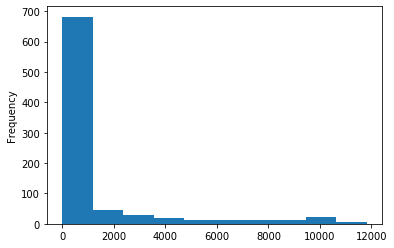

In [0]:
adjectives_length(df)

In [0]:
df.head()
import numpy as np

In [0]:
def text_length(reviews):
    '''
        Prints the stats for number of characters and words in each review.
        And the mean length (in terms of words), std of the reviews

        Note: The dataframe you are passing should have a column 'text' in it for this function to work
    '''

    # reviews['reviews_length_characters'] = reviews['text'].apply(len)
    # print('The character count of the reviews have the following stats: \n')
    # print(reviews['reviews_length_characters'].describe(), '\n')

    reviews['word_length'] = reviews.text.str.len()
    print(reviews['text'])
    print('The word count of the reviews have the following stats: \n')
    print(reviews['word_length'].describe(), '\n')
    # fig, ax = plt.subplots()
    # reviews['word_length'].value_counts().plot.hist()
    # plt.show()
    fig, ax = plt.subplots()
    reviews['word_length'].value_counts().plot(ax=ax, kind='bar')
    # plt.xticks(ax,rotation=90)
    plt.xticks(np.arange(min(ax), max(ax)+1, 1.0))
    plt.tick_params(axis='x', which='major', labelsize=0.5)
    
    plt.tight_layout()

In [0]:
# text_length(df)

0         ["'ll", 'first', 'admit', 'excited', 'going', ...
1         ['one', 'best', 'italian', 'restaurant', 'city...
2         ['absolutely', 'fantastic', 'looking', 'quiet'...
3         ["'s", 'mt', 'washington', 'view', 'inside', '...
4         ['favorite', 'amongst', 'girlfriend', 'family'...
                                ...                        
999995    ['khoury', "'s", 'new', 'improved', 'location'...
999996    ['ever', 'since', 'wife', 'brought', 'home', '...
999997    ['ordered', 'online', 'website', 'chicken', 's...
999998    ['wonderful', 'authentic', 'mediterranean', 'c...
999999    ['place', 'absolutely', 'amazing', 'could', "n...
Name: text, Length: 1000000, dtype: object
The word count of the reviews have the following stats: 

count    1000000.000000
mean         527.064756
std          489.348261
min            2.000000
25%          211.000000
50%          371.000000
75%          669.000000
max         9399.000000
Name: word_length, dtype: float64 



TypeError: ignored

Error in callback <function flush_figures at 0x7f736300c400> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
df.head()

,Unnamed: 0,text,stars_x,real_adjectives,adjectives_len,word_length
0,0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...",236,1407
1,1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...",78,366
2,2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...",158,722
3,3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...",50,443
4,4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...",138,1249


In [0]:
df.drop(columns=['Unnamed: 0'])

,text,stars_x,real_adjectives,adjectives_len,word_length
0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...",236,1407
1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...",78,366
2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...",158,722
3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...",50,443
4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...",138,1249
...,...,...,...,...,...
999995,"['khoury', ""'s"", 'new', 'improved', 'location'...",4,"['new', 'spacious', 'extensive', 'free', 'low'...",110,696
999996,"['ever', 'since', 'wife', 'brought', 'home', '...",5,"['best', 'right']",17,140
999997,"['ordered', 'online', 'website', 'chicken', 's...",5,"['online', 'friendly', 'delicious', 'ready']",44,178
999998,"['wonderful', 'authentic', 'mediterranean', 'c...",5,"['wonderful', 'authentic', 'mediterranean', 'r...",70,170


In [0]:
import matplotlib.pyplot as plt

def ratings_pie_chart(reviews):
    grouped_by_ratings = reviews.groupby('stars_x')
    ratings_vs_count = grouped_by_ratings['stars_x'].describe()
    # print(type(ratings_vs_count))
    print(ratings_vs_count['count'], '\n')
    country_data = ['1', '2', '3', '4', '5']
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
    explode = (0, 0, 0, 0, 0)
    plt.pie(ratings_vs_count['count'], labels=country_data, explode=explode, colors=colors,
            autopct='%1.1f%%', startangle=140)
    plt.title("Ratings Distribution")
    plt.show()
    return 0

In [0]:
print(len(df))

1000000


stars_x
1     96158.0
2     83255.0
3    125090.0
4    264870.0
5    430627.0
Name: count, dtype: float64 



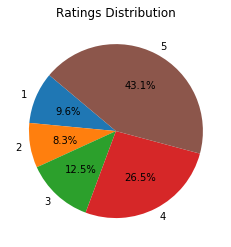

0

In [0]:
ratings_pie_chart(df)

In [0]:
df.head()

,Unnamed: 0,text,stars_x,real_adjectives,adjectives_len,word_length,something
0,0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...",236,1407,<pandas.core.strings.StringMethods object at 0...
1,1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...",78,366,<pandas.core.strings.StringMethods object at 0...
2,2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...",158,722,<pandas.core.strings.StringMethods object at 0...
3,3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...",50,443,<pandas.core.strings.StringMethods object at 0...
4,4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...",138,1249,<pandas.core.strings.StringMethods object at 0...


In [0]:
print(df['real_adjectives'][0])

['excited', 'online', 'special', 'overpriced', 'big', 'special', 'perfect', 'good', 'proud', 'incredible', 'good', 'nice', 'u', 'free', 'last', 'slow', 'large', 'good', 'special', 'chicken', 'good', 'big', 'bland', 'large', 'available']


In [0]:
import ast

In [0]:
global_pos_list=[]
global_neg_list=[]
for  index,row in df.iterrows():
  if(index%10000==0):
    print(index)
  rv_adj_lst_txt=row['real_adjectives']
  rv_adj_list = ast.literal_eval(rv_adj_lst_txt)
  pos_list=[]
  neg_list=[]
  for adj in rv_adj_list:
    ind=adj_list.index(adj)
    pos_list.append(pos_score_list[ind])
    neg_list.append(neg_score_list[ind])
  global_pos_list.append(pos_list)
  global_neg_list.append(neg_list)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [0]:
df['positive_scores']=global_pos_list
df['negative_scores']=global_neg_list

In [0]:
df.head()

,Unnamed: 0,text,stars_x,real_adjectives,adjectives_len,word_length,something,positive_scores,negative_scores
0,0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...",236,1407,<pandas.core.strings.StringMethods object at 0...,"[0.25, 0.0, 0.0, 0.125, 0.25, 0.0, 0.625, 0.75...","[0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0..."
1,1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...",78,366,<pandas.core.strings.StringMethods object at 0...,"[0.75, 0.0, 0.0, 0.75, 0.0, 0.5, 0.375]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]"
2,2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...",158,722,<pandas.core.strings.StringMethods object at 0...,"[0.375, 0.125, 0.0, 0.75, 0.375, 0.0, 0.125, 0...","[0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
3,3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...",50,443,<pandas.core.strings.StringMethods object at 0...,"[0.75, 0.0, 0.0, 0.5]","[0.0, 0.0, 0.0, 0.375]"
4,4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...",138,1249,<pandas.core.strings.StringMethods object at 0...,"[0.125, 0.375, 0.625, 1.0, 0.25, 0.125, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0..."


In [0]:
df.drop(columns=['something'])

,Unnamed: 0,text,stars_x,real_adjectives,adjectives_len,word_length,positive_scores,negative_scores
0,0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...",236,1407,"[0.25, 0.0, 0.0, 0.125, 0.25, 0.0, 0.625, 0.75...","[0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0..."
1,1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...",78,366,"[0.75, 0.0, 0.0, 0.75, 0.0, 0.5, 0.375]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]"
2,2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...",158,722,"[0.375, 0.125, 0.0, 0.75, 0.375, 0.0, 0.125, 0...","[0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
3,3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...",50,443,"[0.75, 0.0, 0.0, 0.5]","[0.0, 0.0, 0.0, 0.375]"
4,4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...",138,1249,"[0.125, 0.375, 0.625, 1.0, 0.25, 0.125, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0..."
...,...,...,...,...,...,...,...,...
999995,999995,"['khoury', ""'s"", 'new', 'improved', 'location'...",4,"['new', 'spacious', 'extensive', 'free', 'low'...",110,696,"[0.375, 0.0, 0.0, 0.375, 0.0, 0.0, 0.75, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0..."
999996,999996,"['ever', 'since', 'wife', 'brought', 'home', '...",5,"['best', 'right']",17,140,"[0.75, 0.0]","[0.0, 0.0]"
999997,999997,"['ordered', 'online', 'website', 'chicken', 's...",5,"['online', 'friendly', 'delicious', 'ready']",44,178,"[0.0, 0.25, 0.75, 0.0]","[0.0, 0.125, 0.0, 0.0]"
999998,999998,"['wonderful', 'authentic', 'mediterranean', 'c...",5,"['wonderful', 'authentic', 'mediterranean', 'r...",70,170,"[0.75, 0.625, 0.0, 0.5, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"


In [0]:
df=df.drop(columns=['Unnamed: 0'])

In [0]:
df.head()

,text,stars_x,real_adjectives,adjectives_len,word_length,something,positive_scores,negative_scores
0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...",236,1407,<pandas.core.strings.StringMethods object at 0...,"[0.25, 0.0, 0.0, 0.125, 0.25, 0.0, 0.625, 0.75...","[0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0..."
1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...",78,366,<pandas.core.strings.StringMethods object at 0...,"[0.75, 0.0, 0.0, 0.75, 0.0, 0.5, 0.375]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]"
2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...",158,722,<pandas.core.strings.StringMethods object at 0...,"[0.375, 0.125, 0.0, 0.75, 0.375, 0.0, 0.125, 0...","[0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...",50,443,<pandas.core.strings.StringMethods object at 0...,"[0.75, 0.0, 0.0, 0.5]","[0.0, 0.0, 0.0, 0.375]"
4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...",138,1249,<pandas.core.strings.StringMethods object at 0...,"[0.125, 0.375, 0.625, 1.0, 0.25, 0.125, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0..."


In [0]:
df=df[['text','stars_x','real_adjectives','positive_scores','negative_scores','word_length','adjectives_len']]

In [0]:
df.head()

,text,stars_x,real_adjectives,positive_scores,negative_scores,word_length,adjectives_len
0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...","[0.25, 0.0, 0.0, 0.125, 0.25, 0.0, 0.625, 0.75...","[0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...",1407,236
1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...","[0.75, 0.0, 0.0, 0.75, 0.0, 0.5, 0.375]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]",366,78
2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...","[0.375, 0.125, 0.0, 0.75, 0.375, 0.0, 0.125, 0...","[0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",722,158
3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...","[0.75, 0.0, 0.0, 0.5]","[0.0, 0.0, 0.0, 0.375]",443,50
4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...","[0.125, 0.375, 0.625, 1.0, 0.25, 0.125, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...",1249,138


In [0]:
df=df.drop(columns=['word_length','adjectives_len'])

In [0]:
df.head()

,text,stars_x,real_adjectives,positive_scores,negative_scores
0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...","[0.25, 0.0, 0.0, 0.125, 0.25, 0.0, 0.625, 0.75...","[0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0..."
1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...","[0.75, 0.0, 0.0, 0.75, 0.0, 0.5, 0.375]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]"
2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...","[0.375, 0.125, 0.0, 0.75, 0.375, 0.0, 0.125, 0...","[0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...","[0.75, 0.0, 0.0, 0.5]","[0.0, 0.0, 0.0, 0.375]"
4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...","[0.125, 0.375, 0.625, 1.0, 0.25, 0.125, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0..."


In [0]:
df.to_csv('adjectives_1.csv')

********************************

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/'My Drive'/'CIS 520 Project'

/content/drive/My Drive/CIS 520 Project


In [0]:
ls

 adjective_freq.json         restaurant_reviews.csv
 Adjective.ipynb             reviews_bow.csv
 adjectives_1.csv            reviews_bow.csv.zip
 adjectives.csv              Run.ipynb
 adj_freq.csv                text_stars.csv
'lexica dictionaries.gdoc'   word2vec_adj.bin
 __MACOSX/                   word2vec_embed.bin.trainables.syn1neg.npy


In [0]:
import pandas as pd
import ast


In [0]:
df1=pd.read_csv('adjectives_1.csv')
df1=df1.drop(columns=['Unnamed: 0'])
df1.head()

,text,stars_x,real_adjectives,positive_scores,negative_scores
0,"[""'ll"", 'first', 'admit', 'excited', 'going', ...",4,"['excited', 'online', 'special', 'overpriced',...","[0.25, 0.0, 0.0, 0.125, 0.25, 0.0, 0.625, 0.75...","[0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0..."
1,"['one', 'best', 'italian', 'restaurant', 'city...",5,"['best', 'italian', 'several', 'delicious', 'i...","[0.75, 0.0, 0.0, 0.75, 0.0, 0.5, 0.375]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]"
2,"['absolutely', 'fantastic', 'looking', 'quiet'...",5,"['fantastic', 'quiet', 'relaxed', 'delicious',...","[0.375, 0.125, 0.0, 0.75, 0.375, 0.0, 0.125, 0...","[0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
3,"[""'s"", 'mt', 'washington', 'view', 'inside', '...",4,"['outstanding', 'enormous', 'enormous', 'crypt...","[0.75, 0.0, 0.0, 0.5]","[0.0, 0.0, 0.0, 0.375]"
4,"['favorite', 'amongst', 'girlfriend', 'family'...",5,"['favorite', 'fantastic', 'authentic', 'excell...","[0.125, 0.375, 0.625, 1.0, 0.25, 0.125, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0..."


In [0]:
print(len(df1))

1000000


In [0]:
adj_list=[]
pos_list=[]
neg_list=[]

In [0]:

i=0
for index, row in df1.iterrows():
  adjlist=ast.literal_eval(row['real_adjectives'])
  poslist=ast.literal_eval(row['positive_scores'])
  neglist=ast.literal_eval(row['negative_scores'])
  for word in adjlist:
    if((i%1000)==0):
      print(i)
    i+=1
    if word not in adj_list:
      adj_list.append(word)
      local_index=adjlist.index(word)
      pos_list.append(poslist[local_index])
      neg_list.append(neglist[local_index])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [0]:
  print(len(adj_list))

9493


In [0]:
print(len(pos_list))

9493


In [0]:
print(adj_list[0],pos_list[0],neg_list[0])

excited 0.25 0.5


In [0]:
p_indices=sorted(range(len(pos_list)), key=lambda i: pos_list[i])[-20:]
n_indices=sorted(range(len(neg_list)), key=lambda i: neg_list[i])[-20:]

top 20 positice adjectives

In [0]:
for ind in p_indices:
  print(pos_list[ind])
  print(adj_list[ind])


0.875
awing
0.875
flushed
0.875
selfless
0.875
quaintest
0.875
diffident
0.875
betterer
0.875
faber
0.875
rosy-cheeked
0.875
solider
0.875
worthiest
0.875
peachier
0.875
decenter
1.0
excellent
1.0
fantabulous
1.0
sensational
1.0
top-flight
1.0
topping
1.0
first-class
1.0
estimable
1.0
top-hole


Top 20 negative adjectives


In [0]:
for ind in n_indices:
  print(neg_list[ind])
  print(adj_list[ind])


0.875
maddening
0.875
fireproof
0.875
thorny
0.875
cataclysmic
0.875
simulated
0.875
untreated
0.875
lugubrious
0.875
chintziest
0.875
slanderous
0.875
spasmodic
0.875
convulsive
0.875
bush-league
0.875
incontrovertible
0.875
mussy
0.875
otherworldly
0.889
inauspicious
1.0
shoddy
1.0
deplorable
1.0
lamentable
1.0
shoddier


In [0]:
print(sum(pos_list)/len(pos_list))


0.24987807984666022


In [0]:
print(sum(neg_list)/len(neg_list))

0.11975715411653765


In [0]:
maxposwordindex=[]
indexlist=[i for i in range(len(pos_list)) if pos_list[i]==1.0]
print(len(indexlist))
# for score in pos_list:
#   if score==1.0:
#     # print(pos_list.index(score))
#     maxposwordindex.append(pos_list.index(score))



67880


In [0]:
perfect_pos_score_words=[]
for index in indexlist:
  perfect_pos_score_words.append(adj_list[index])

In [0]:
unique_perfect_pos_score_words=set(perfect_pos_score_words)

In [0]:
print(unique_perfect_pos_score_words)

{'top-flight', 'sensational', 'topping', 'first-class', 'excellent', 'fantabulous', 'estimable', 'top-hole'}
